In [35]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

# Data Cleaning

Add new colunm names to and read.data file

In [36]:
df = pd.read_csv("./data/abalone.data", names=['sex','length','diameter','height','w_weight','s_weight','v_weight','shell_weight', 'rings'], header=None)
df.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Create the age colunm by adding 1.5 years to the rings

In [37]:
df['age'] = df.apply(lambda row: row.rings + 1.5, axis=1)
df.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Represent sex data as numerical values. lets check unique values in sex and map then to numbers 0-2

In [38]:
df.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [39]:
df['sex'] = df.sex.map({'M':0, 'F':1, 'I': 2})
df.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,shell_weight,rings,age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Check to missing values

In [40]:
df.isnull().sum()

sex             0
length          0
diameter        0
height          0
w_weight        0
s_weight        0
v_weight        0
shell_weight    0
rings           0
age             0
dtype: int64

Get information and desrciption of our dataset

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
sex             4177 non-null int64
length          4177 non-null float64
diameter        4177 non-null float64
height          4177 non-null float64
w_weight        4177 non-null float64
s_weight        4177 non-null float64
v_weight        4177 non-null float64
shell_weight    4177 non-null float64
rings           4177 non-null int64
age             4177 non-null float64
dtypes: float64(8), int64(2)
memory usage: 326.4 KB


,sex,length,diameter,height,w_weight,s_weight,v_weight,shell_weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


From our datasets, we have no categorical colunms which allows us to use a regression to try and predict the age of our Abalone based on each features stated above.
We start by Checking the correlation of each feature with the age of the Abalone.

In [42]:
# drop quality and check correlations
correlations = df.corr()['age'].drop('age')
correlations

sex            -0.351822
length          0.556720
diameter        0.574660
height          0.557467
w_weight        0.540390
s_weight        0.420884
v_weight        0.503819
shell_weight    0.627574
rings           1.000000
Name: age, dtype: float64

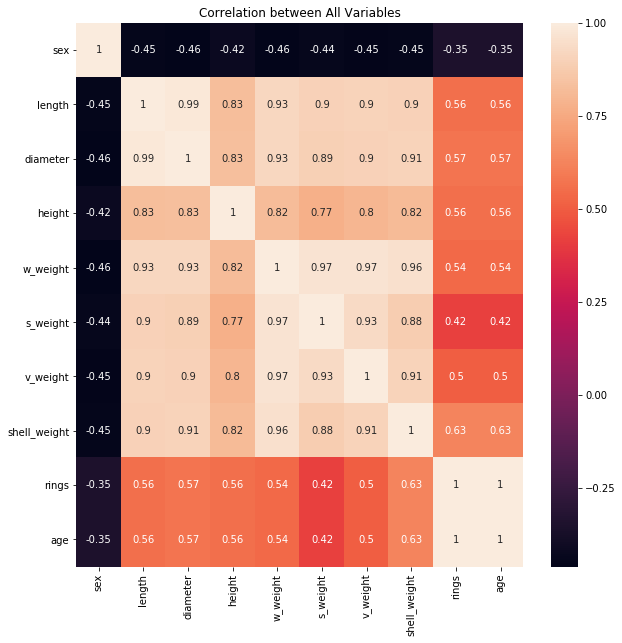

In [43]:
# sns.heatmap(wwine.corr())
corr = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between All Variables')
plt.show()

We can see from the above matrix, age with (Shucked Weight) are not as correlated as the rest of the features. but we will not be dropping it. but lets drop rings and age as they have a 1,1 correlation

In [44]:
final = df.drop(['rings', 'age'], axis = 1) 
final.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


Features with correlation as input x and quality as target variable y.

In [45]:
x = final
y = df.age

Lets split our data into test and train sets using sklearn train_test_split function. We randomise the data to allow non-linear selection.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

Lets check the split 

In [47]:
x_train.shape, x_test.shape, df.shape

((3132, 8), (1045, 8), (4177, 10))

25 percent of the Ablone data is used for testing, and 75percent for training 

# Building The Model

Lets normalise/standardize our features before applying the machine learning techniques

In [48]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Lets do a cross validation using (kfold) to check which algortihm works best for our standadised train and test data, we will import (Decision Tree Algorithm, Random Forest, GradientBoosting, and Support Vector Regression (SVR) from sklearn. We will validate the models using Mean Absolute Error and Mean Sqaured Error

In [49]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

create a list of models and loop through them to evaluate our data with all the models in the list

In [50]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR(gamma='scale')))
names = []

# Mean Squared Error Results

In [51]:

for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=1)
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    results = model_selection.cross_val_score(model,x_train_scaled,y_train, cv= kfold, scoring=scorer)
    names.append(name)
    msg  = "%s: %f" % (name, -1*(results).mean())
    print(msg)

LinearRegression: 5.149978
DecisionTree: 9.188621
RandomForest: 5.246610
GradienBoost: 4.760106
Ridge: 5.149665
Lasso: 7.359964
SVR: 4.878664


# Mean Absolute Error Results

In [52]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=1)
    results = model_selection.cross_val_score(model,x_train_scaled,y_train, cv= kfold, scoring='neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(results).mean())
    print(msg)

LinearRegression: 1.595108
DecisionTree: 2.107628
RandomForest: 1.613773
GradienBoost: 1.527571
Ridge: 1.595020
Lasso: 1.964200
SVR: 1.494338


The less the Mean the better the model for our data. From the above models, Support Vector Regression (SVR) or GradientBoost is the best choice model

# Support Vector Regression SVR Model

We start with a SVR and tweak the gamma, and C fit it to our scalled x_train and y_train data, and pred scalled_x_test

In [34]:
model = SVR(gamma='scale')
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

We follow that up with a mean absolute error calcualtion of our prediciton against out test data.

In [120]:
mean_absolute_error(y_pred,y_test), mean_squared_error(y_pred,y_test)

(1.4622740326549615, 4.344156519910412)

Ground truth check of S weight (that has the highest correlation with age as seen above) vs predicted test data 

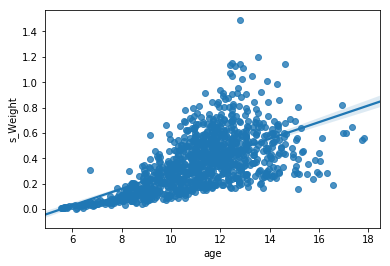

In [93]:

y_axis = list(y_pred)
x_axis = list(x_test['s_weight'])

d = {'age': y_axis, 's_Weight': x_axis}
plot_data = pd.DataFrame(d)

# tips = sns.load_dataset("tips")
sns.regplot(x="age", y="s_Weight", data=plot_data);
# tips


In [ ]:
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
# svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv=5)
# svr.fit(x_train_scaled,y_train)

# Model tuning

In [2]:
# https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv